This here notebook is going to be a test of Optical Image Subtraction, a random routine I found on the internet!

https://optimal-image-subtraction.readthedocs.io/en/stable/index.html

In [1]:
from ois import optimal_system

from astropy.io import fits #FITS files handling

from astropy.stats import sigma_clipped_stats, SigmaClip # statistics

import matplotlib.pyplot as plt #Plot

from reproject import reproject_interp # for reprojection

In [63]:
# Some global parameters
window=50 # Size of subtraction region.

## Verify Images

Just check out the raw images first (flag to turn off?)

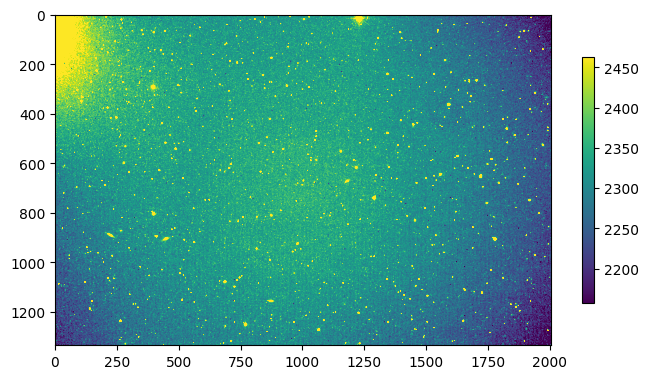

In [2]:
test_image = fits.open("SUM_Aligned_20230315_I.fits")
#refimage=fits.open("SUM_Aligned_20240512_I.fits")
#image = fits.open(align_image_array[i])
mean, median, std = sigma_clipped_stats(test_image[0].data)
plt.figure(figsize=(8,8))

# set the scale of the image based on its statistics
# Name looks totally wrong!
plt.imshow(test_image[0].data, vmin=median-2*std, vmax=median+2*std)
plt.colorbar(shrink = 0.4)
#plt.title('Resampled image: '+align_image_array[i])
plt.show()

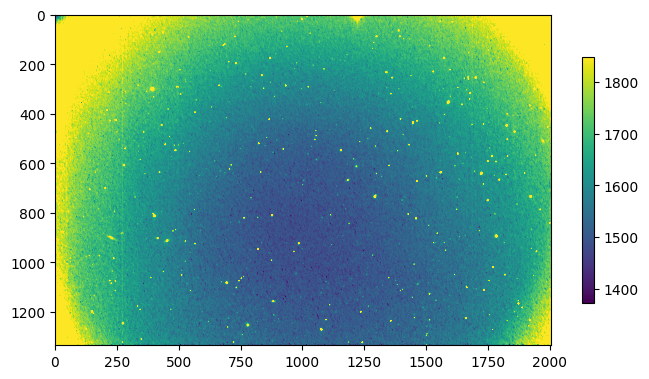

In [3]:
#test_image = fits.open("SUM_Aligned_20230315_I.fits")
refimage=fits.open("SUM_Aligned_20240512_I.fits")
#image = fits.open(align_image_array[i])
mean, median, std = sigma_clipped_stats(refimage[0].data)
plt.figure(figsize=(8,8))

# set the scale of the image based on its statistics
# Name looks totally wrong!
plt.imshow(refimage[0].data, vmin=median-2*std, vmax=median+2*std)
plt.colorbar(shrink = 0.4)
#plt.title('Resampled image: '+align_image_array[i])
plt.show()

## Align the Images

This was done with SWARP before, but seems like we can do it with reproject: https://github.com/astropy/reproject

In [21]:
# Projecting science image into reference
array, footprint = reproject_interp(test_image[0], refimage[0].header)
#array, footprint = reproject_interp(test_image[0], ref_wcs,shape_out=(500,500))

Set MJD-AVG to 60019.279550 from DATE-AVG'. [astropy.wcs.wcs]
Set MJD-AVG to 60443.226249 from DATE-AVG'. [astropy.wcs.wcs]


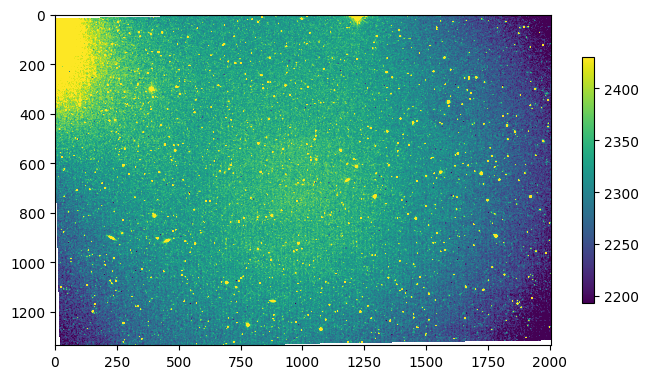

In [23]:
#test_image = fits.open("SUM_Aligned_20230315_I.fits")
#refimage=fits.open("SUM_Aligned_20240512_I.fits")
#image = fits.open(align_image_array[i])
mean, median, std = sigma_clipped_stats(array)
plt.figure(figsize=(8,8))

# set the scale of the image based on its statistics
# Name looks totally wrong!
plt.imshow(array, vmin=median-2*std, vmax=median+2*std)
plt.colorbar(shrink = 0.4)
#plt.title('Resampled image: '+align_image_array[i])
plt.show()

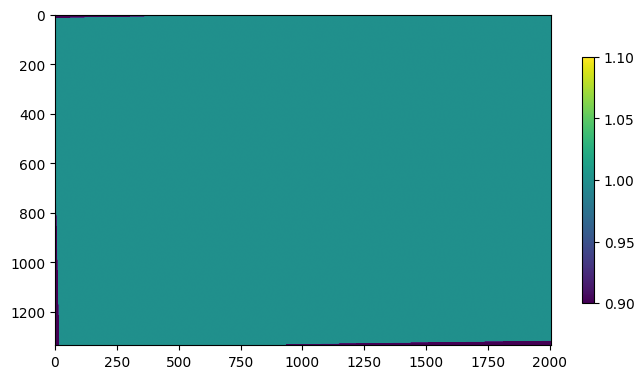

In [24]:
#test_image = fits.open("SUM_Aligned_20230315_I.fits")
#refimage=fits.open("SUM_Aligned_20240512_I.fits")
#image = fits.open(align_image_array[i])
mean, median, std = sigma_clipped_stats(footprint)
plt.figure(figsize=(8,8))

# set the scale of the image based on its statistics
# Name looks totally wrong!
plt.imshow(footprint, vmin=median-2*std, vmax=median+2*std)
plt.colorbar(shrink = 0.4)
#plt.title('Resampled image: '+align_image_array[i])
plt.show()

## OIS Subtraction Routine

First crop the images down...

In [33]:
from astropy.nddata import Cutout2D
from astropy import units as u
import math

In [36]:
position = (math.floor(refimage[0].data.shape[0]/2),math.floor(refimage[0].data.shape[1]/2))
position

(668, 1002)

In [53]:
size=(400,400)
ref_cutout = Cutout2D(refimage[0].data, position, size)
sci_cutout=Cutout2D(array, position, size)

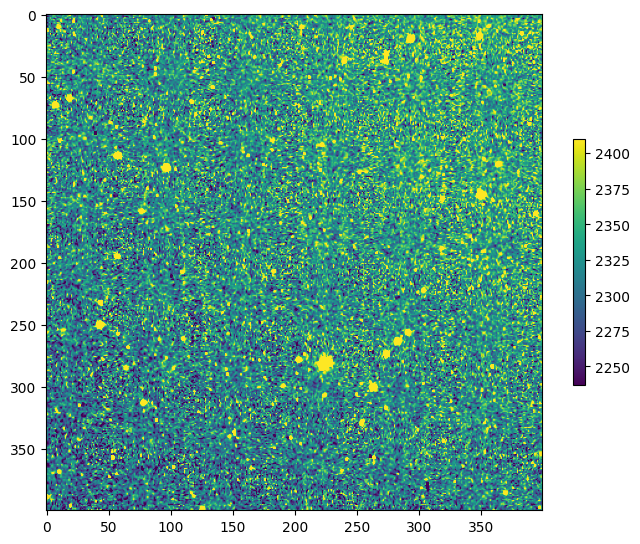

In [55]:
mean, median, std = sigma_clipped_stats(sci_cutout.data)
plt.figure(figsize=(8,8))
# set the scale of the image based on its statistics
# Name looks totally wrong!
plt.imshow(sci_cutout.data, vmin=median-2*std, vmax=median+2*std)
plt.colorbar(shrink = 0.4)
#plt.title('Resampled image: '+align_image_array[i])
plt.show()

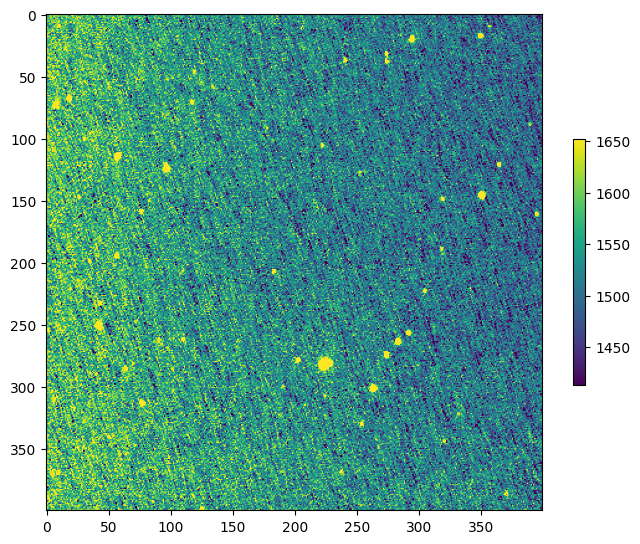

In [56]:
mean, median, std = sigma_clipped_stats(ref_cutout.data)
plt.figure(figsize=(8,8))
# set the scale of the image based on its statistics
# Name looks totally wrong!
plt.imshow(ref_cutout.data, vmin=median-2*std, vmax=median+2*std)
plt.colorbar(shrink = 0.4)
#plt.title('Resampled image: '+align_image_array[i])
plt.show()

In [57]:
diff_image, optimal_image, kernel, background = optimal_system(sci_cutout.data, ref_cutout.data)
#diff_image, optimal_image, kernel, background = optimal_system(array, ref_wcs,shape_out=(100,100))

In [61]:
diff_image

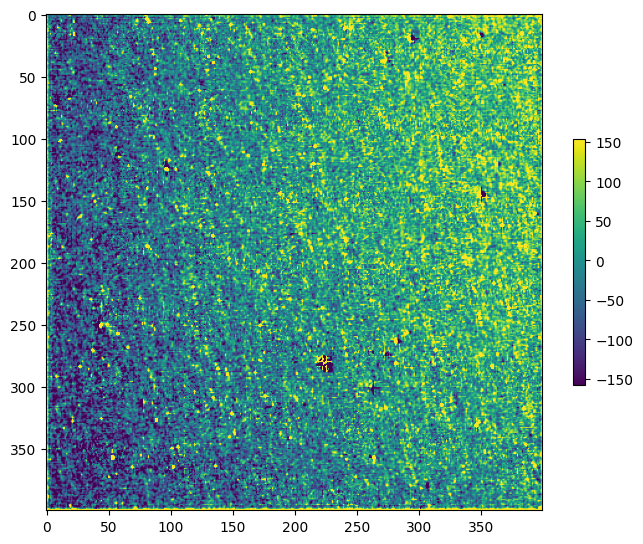

In [62]:
    mean, median, std = sigma_clipped_stats(diff_image.data)
    plt.figure(figsize=(8,8))

    # set the scale of the image based on its statistics
    # Name looks totally wrong!
    plt.imshow(diff_image.data, vmin=median-2*std, vmax=median+2*std)
    plt.colorbar(shrink = 0.4)
    #plt.title('Resampled image: '+align_image_array[i])
    plt.show()